In [1]:
n = ord('I') % 3 + 1
print(f"Варіант №{n}")

Варіант №2


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# функція ортимання індексу шуканої колонки
def get_column_index(row, column_name):
    col_index = 0
    checking = True
    while checking:
        if row[col_index] == column_name:
            checking = False
        col_index += 1
    return col_index - 1

In [4]:
# функція отримання даних про конкретні втрати російської техніки ("танки")
def get_loses(file_name, column_name):
    personnel = []
    with open(file_name) as file: 
        csv_reader = csv.reader(file)
        row_number = 0
        for row in csv_reader:
            if row_number == 0:
                col_number = get_column_index(row, column_name)
                row_number += 1
            else:
                personnel.append(int(row[col_number]))
    return personnel         

tank_losses = np.array(get_loses('./russia_losses_equipment.csv', 'tank'))

In [5]:
# функція вивидення щоденних втрат танків
def daily_losses(losses):
    diff_arr = np.diff(losses)
    diff_arr = np.insert(diff_arr, 0, losses[0])
    return diff_arr

print("Добові втрати танків: ", daily_losses(tank_losses)[:30])

Добові втрати танків:  [80 66  4  0 48 13  6 34 18 16  5 13 14 18 18  9 12 15 15 26 14  6 16 10
 22 11  8 13 31 14]


In [6]:
# функція виведення 4 найбільших добових втрат танків
def biggest_daily_losses(losses):
    biggest_losses = np.sort(losses)[-4:]
    return biggest_losses

dl = daily_losses(tank_losses)
print('4 найбільші добові втрати танків: ', biggest_daily_losses(dl))

4 найбільші добові втрати танків:  [48 55 66 80]


In [7]:
# функція виведення втрат танків за весну 2023
def spring_losses(losses):
    spring_start = losses[369]
    spring_end = losses[461]
    return spring_end - spring_start

print(f"За весну 2023 було знищено: {spring_losses(tank_losses)} танків")

За весну 2023 було знищено: 409 танків


In [8]:
# функція вивдеення середньої кількості знищеної техніки за останні 100 днів
def avarage_last_losses(losses, last_days):
    last_losses = losses[(last_days * -1):]
    return np.sum(last_losses) / last_days

print(f'За останні 100 днів в середньому знищувалось {int(avarage_last_losses(dl, 100))} танків за добу')

За останні 100 днів в середньому знищувалось 9 танків за добу


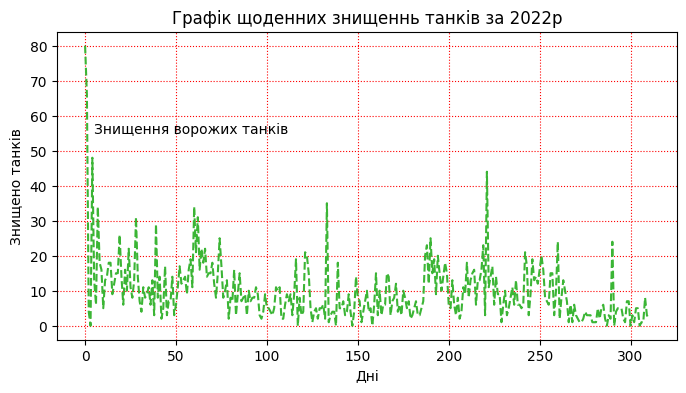

In [9]:
# функція для вивдеення графічної інформації про знищені танки в 2022 
def last_year_losses_graph(losses):
    plt.figure(figsize=(8,4))
    
    plt.title('Графік щоденних знищеннь танків за 2022р')
    plt.xlabel('Дні')
    plt.ylabel('Знищено танків')
    plt.text(5, 55, 'Знищення ворожих танків')
    
    plt.plot(losses[0:311], ls = '--', color = '#3bb535')
    
    plt.grid(color = 'r', linestyle = ':')
    plt.savefig('Losses_tanks.png')
    plt.show()

last_year_losses_graph(dl)